<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [2]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [3]:
# Start coding here! Use as many cells as you like
# Exibir informações básicas sobre os dados
print("\nVisão geral do DataFrame:")
print(netflix_df.info())



Visão geral do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


In [4]:
# Exibir estatísticas descritivas
print("\nEstatísticas descritivas:")
print(netflix_df.describe(include='all'))


Estatísticas descritivas:
       show_id  ...   genre
count     4812  ...    4812
unique    4812  ...      31
top         s2  ...  Dramas
freq         1  ...    1343
mean       NaN  ...     NaN
std        NaN  ...     NaN
min        NaN  ...     NaN
25%        NaN  ...     NaN
50%        NaN  ...     NaN
75%        NaN  ...     NaN
max        NaN  ...     NaN

[11 rows x 11 columns]


In [5]:
# Verificar valores nulos
def missing_values_table(df):
    missing_values = df.isnull().sum()
    missing_values_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({"Valores Faltantes": missing_values, "Percentual": missing_values_percent})
    missing_df = missing_df[missing_df["Valores Faltantes"] > 0].sort_values(by="Percentual", ascending=False)
    return missing_df

print("\nValores faltantes:")
print(missing_values_table(netflix_df))


Valores faltantes:
Empty DataFrame
Columns: [Valores Faltantes, Percentual]
Index: []


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Preenchimento de valores nulos
netflix_df["country"].fillna("Desconhecido", inplace=True)
netflix_df["director"].fillna("Desconhecido", inplace=True)
netflix_df["cast"].fillna("Desconhecido", inplace=True)


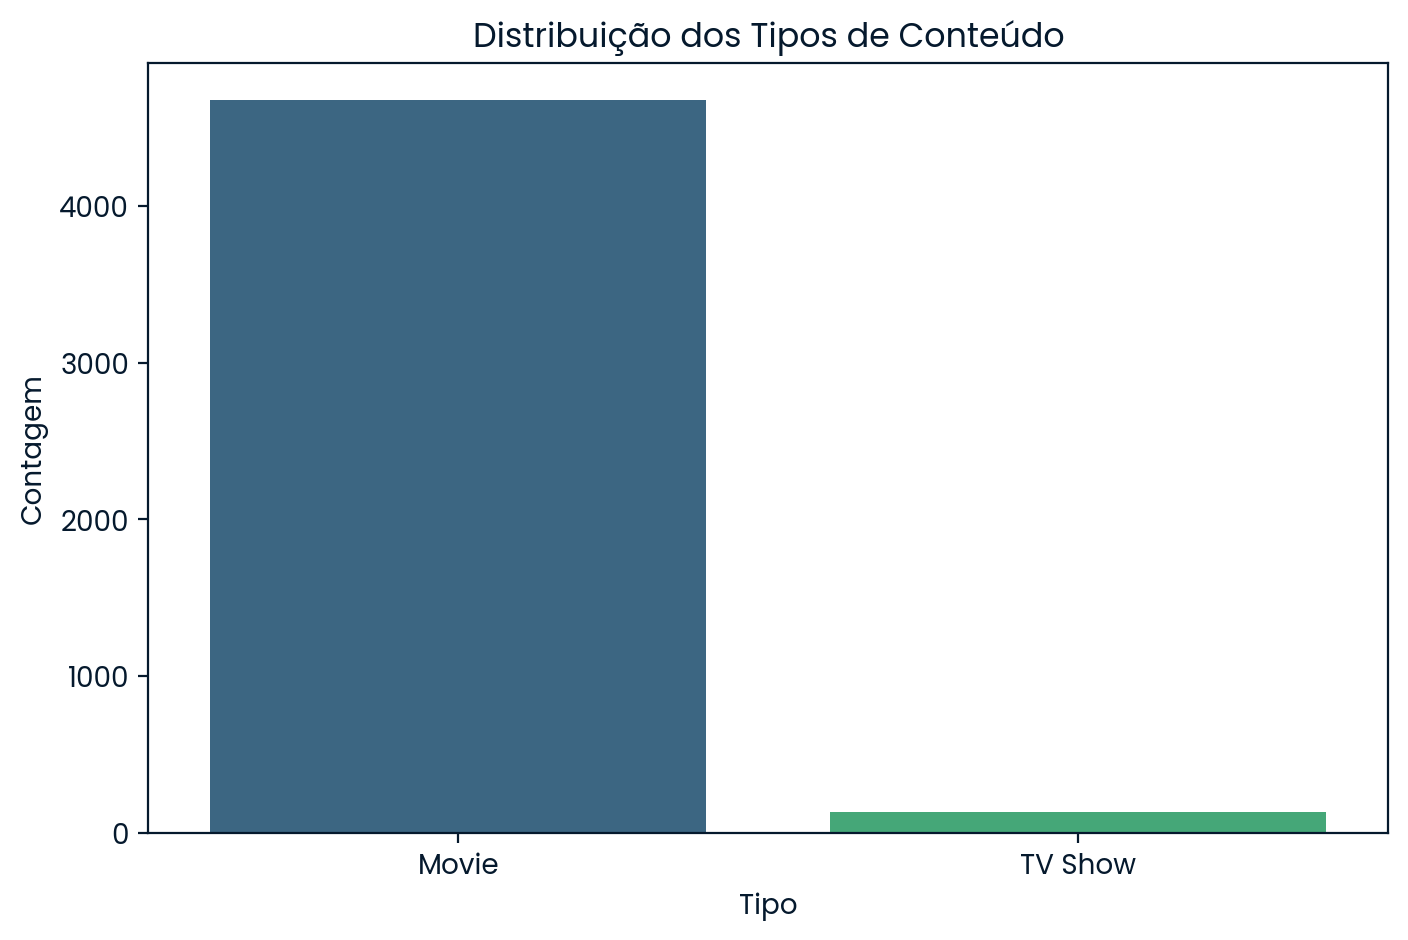

In [8]:
# Distribuição dos tipos de conteúdo
plt.figure(figsize=(8, 5))
sns.countplot(data=netflix_df, x='type', palette='viridis')
plt.title("Distribuição dos Tipos de Conteúdo")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()


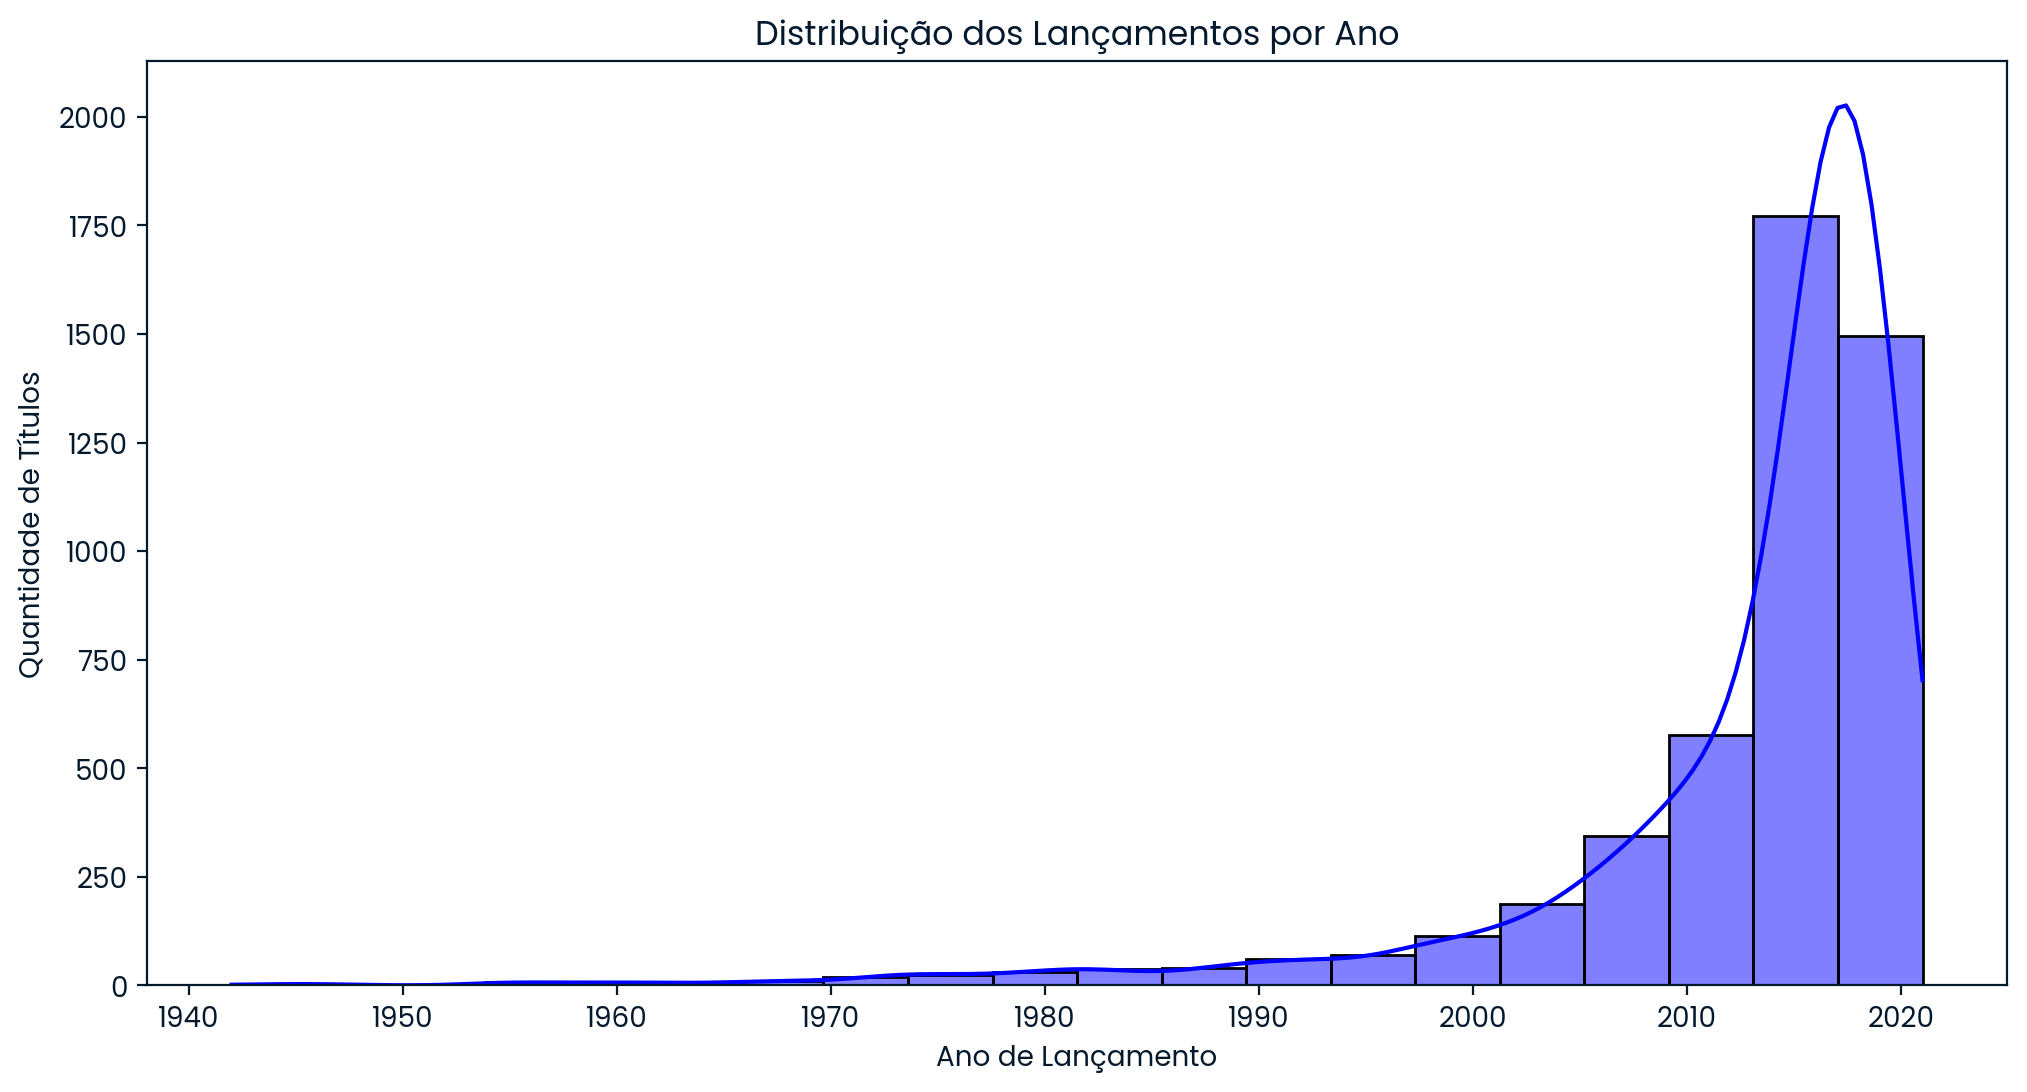

In [9]:
# Distribuição de lançamentos ao longo dos anos
plt.figure(figsize=(12, 6))
sns.histplot(netflix_df["release_year"].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribuição dos Lançamentos por Ano")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Títulos")
plt.show()

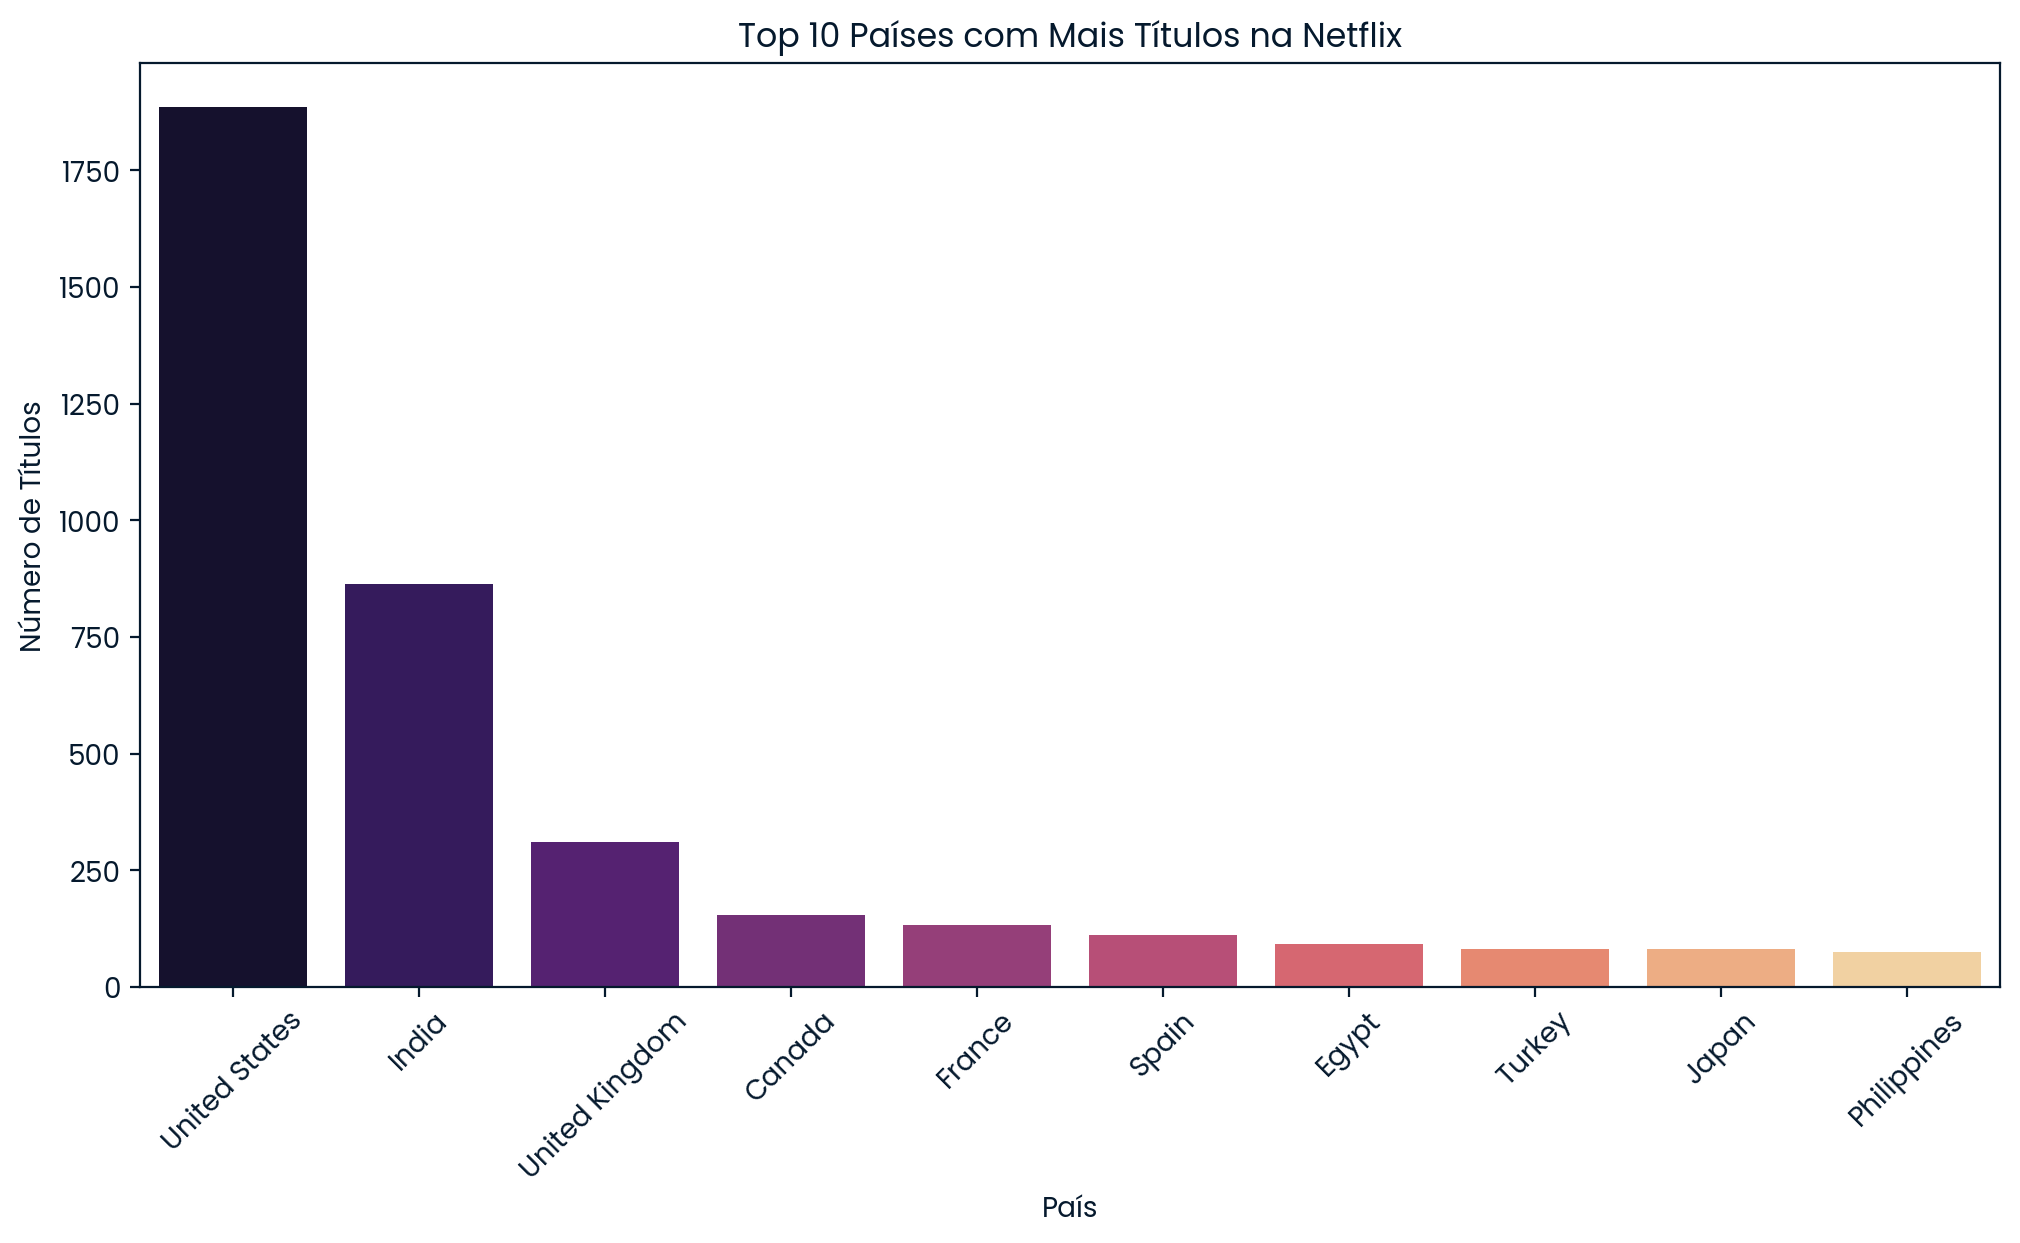

In [10]:
# Top 10 países com mais títulos
plt.figure(figsize=(12, 6))
country_counts = netflix_df["country"].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Top 10 Países com Mais Títulos na Netflix")
plt.xlabel("País")
plt.ylabel("Número de Títulos")
plt.show()

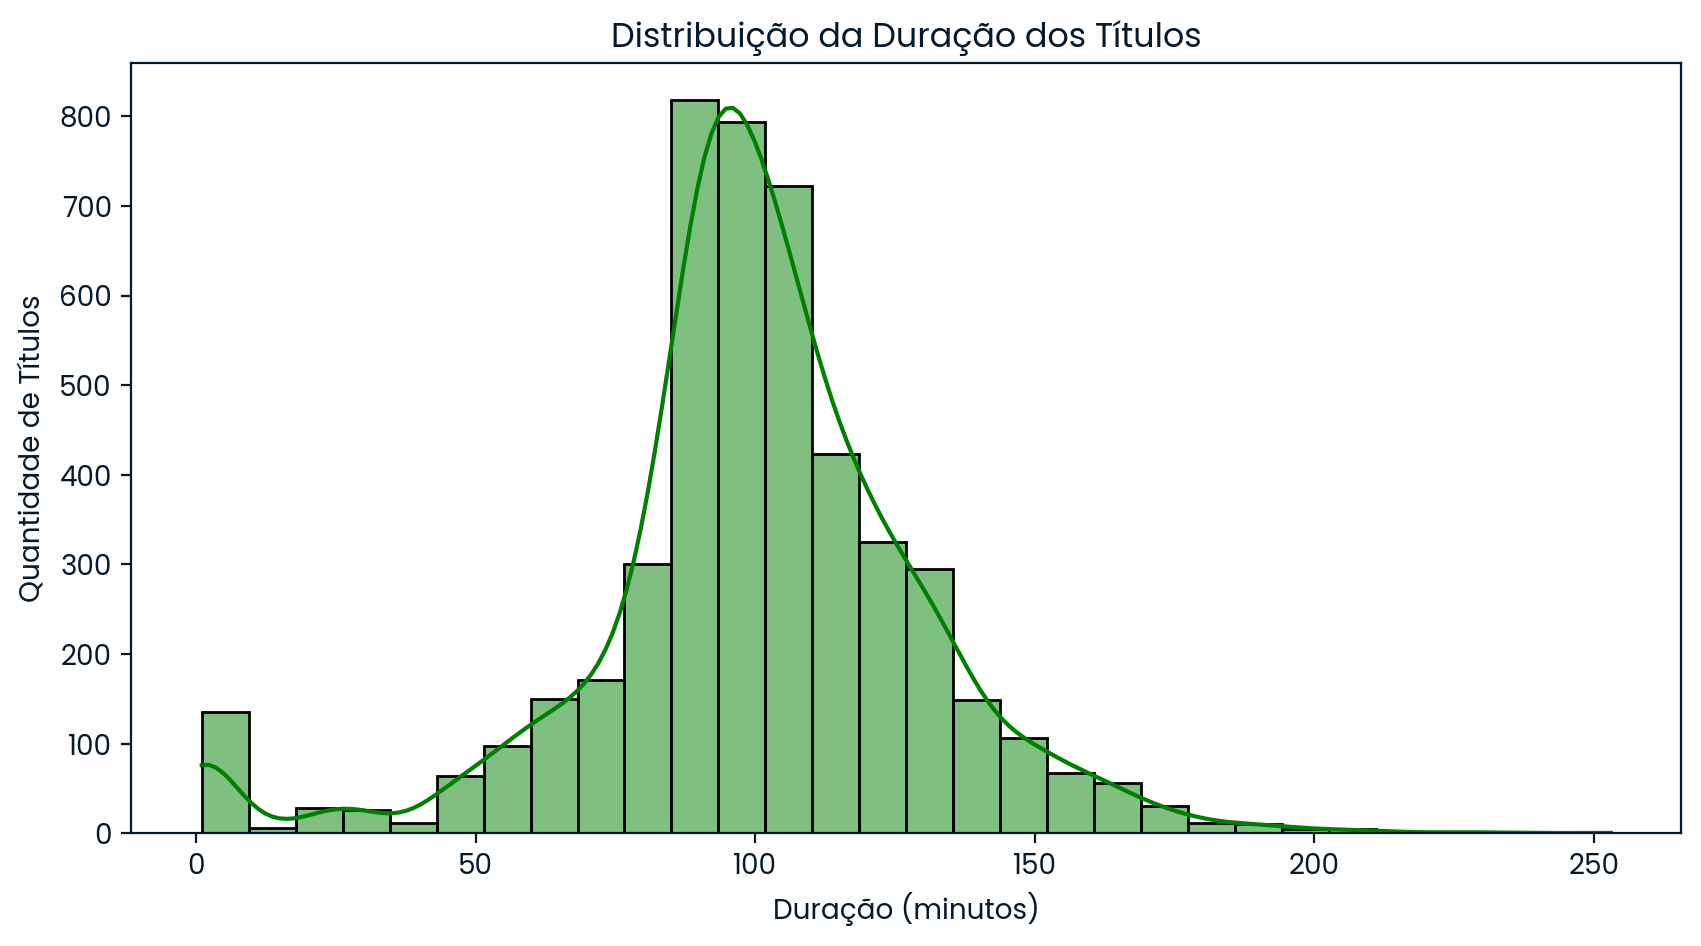

In [11]:
# Garantir que a coluna "duration" é do tipo string antes de usar .str.replace()
netflix_df["duration"] = netflix_df["duration"].astype(str).str.replace(" min", "", regex=False)

# Converter para numérico, transformando valores não conversíveis em NaN
netflix_df["duration"] = pd.to_numeric(netflix_df["duration"], errors='coerce')

plt.figure(figsize=(10, 5))
sns.histplot(netflix_df["duration"].dropna(), bins=30, kde=True, color='green')
plt.title("Distribuição da Duração dos Títulos")
plt.xlabel("Duração (minutos)")
plt.ylabel("Quantidade de Títulos")
plt.show()

In [12]:
# Filtrar filmes da década de 1990
movies_90s = netflix_df[(netflix_df["release_year"] >= 1990) & (netflix_df["release_year"] < 2000)]

# Encontrar a duração mais frequente
duration = movies_90s["duration"].mode().iloc[0]  # Obtém o valor mais frequente

# Contar filmes de ação curtos na década de 1990
short_movie_count = movies_90s[(movies_90s["duration"] < 90) & (movies_90s["genre"].str.contains("Action", na=False))].shape[0]

# Exibir resultados
print(f"Duração mais frequente dos filmes nos anos 90: {duration} minutos")
print(f"Número de filmes de ação curtos nos anos 90: {short_movie_count}")


Duração mais frequente dos filmes nos anos 90: 94 minutos
Número de filmes de ação curtos nos anos 90: 7


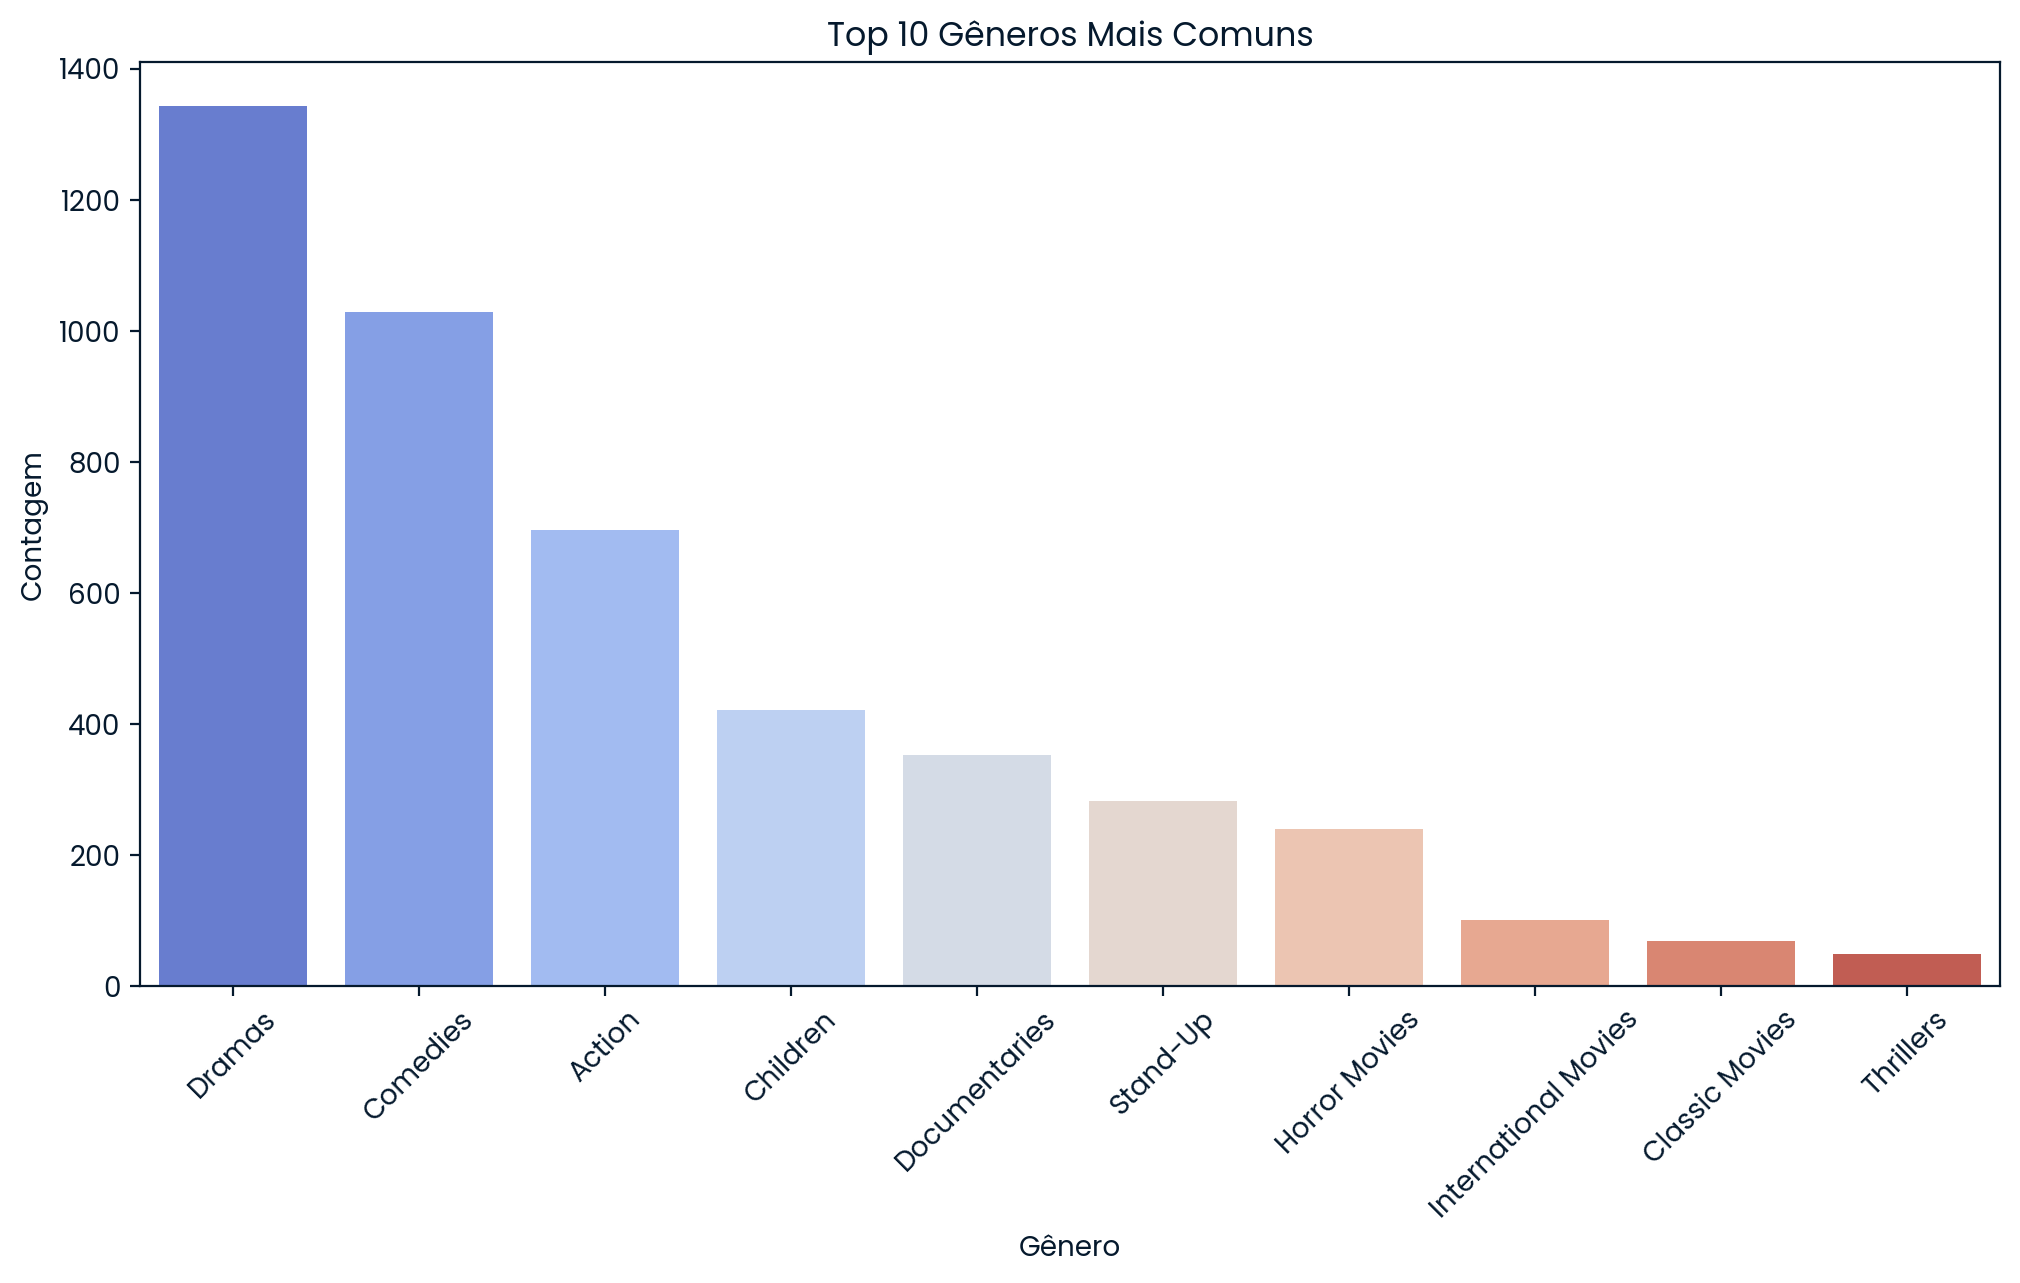


Análise Exploratória Concluída!


In [13]:
# Contagem de gêneros
plt.figure(figsize=(12, 6))
genres = netflix_df["genre"].str.split(",").explode()
genre_counts = genres.value_counts().head(10)
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Gêneros Mais Comuns")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.show()

print("\nAnálise Exploratória Concluída!")